# 📌 Marketing Campaigns Machine Learning project

* By: Nadeen Abu Hilweh

#### 📝Problem scenario:

######Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

#### ✨Problem objective:
###### As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.


#### 📈Data description:
######The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.

Step 1. **Data Import & Initial Check**

   * Load the dataset and examine variables such as `Dt_Customer` and `Income` to ensure correct import.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
# for uploading dataset
from google.colab import files
uploaded = files.upload()

Saving marketing_data.csv to marketing_data.csv


In [5]:
# Load the data
df = pd.read_csv('marketing_data.csv')

In [6]:
# Display basic information
print("Dataset Shape:", df.shape)

Dataset Shape: (2240, 28)


In [7]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [8]:
print("\nlast 5 rows:")
df.tail()


last 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,03/07/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/03/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,09/01/2012,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [9]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 

In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [11]:
df.columns = df.columns.str.strip()  # Remove whitespace from column names

In [12]:
print("\n=== Sample of Dt_Customer and Income ===")
df[['Dt_Customer','Income']].head(10)



=== Sample of Dt_Customer and Income ===


,Dt_Customer,Income
0,6/16/14,"$84,835.00"
1,6/15/14,"$57,091.00"
2,5/13/14,"$67,267.00"
3,05/11/2014,"$32,474.00"
4,04/08/2014,"$21,474.00"
5,3/17/14,"$71,691.00"
6,1/29/14,"$63,564.00"
7,1/18/14,"$44,931.00"
8,01/11/2014,"$65,324.00"
9,01/11/2014,"$65,324.00"


In [13]:
# Convert Dt_Customer to datetime (Data Preprocessing)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [14]:
# Transform income column to a numerical
df['Income'] = df['Income'].str.replace(',','').str.replace('$','').astype('float')
df['Income'].dtype

dtype('float64')

Step 2. **Data Cleaning & Income Imputation**

   * Handle missing income values using group-based mean imputation, considering education and marital status.
   * Clean categorical variables (strip spaces, standardize capitalization, consolidate rare categories).


In [15]:
# Clean Education column
df['Education'] = df['Education'].str.strip().str.title()

# Clean Marital_Status column
df['Marital_Status'] = df['Marital_Status'].str.strip().str.title()
rare_status = ['Alone', 'Yolo', 'Absurd']
df['Marital_Status'] = df['Marital_Status'].replace(rare_status, 'Other')

In [16]:
# Check missing income values
df['Income'].isna().sum()

np.int64(24)

In [17]:
# Calculate mean income by Education and Marital_Status
income_group_mean = (
    df.groupby(['Education', 'Marital_Status'])['Income']
    .mean()
)

In [18]:
# Create a Series of group-based income values
income_imputed = df.apply(
    lambda row: income_group_mean.get(
        (row['Education'], row['Marital_Status'])
    ),
    axis=1
)

In [19]:
# Fill only missing Income values
df['Income'] = df['Income'].fillna(income_imputed)


In [20]:
df['Income'].isna().sum()

np.int64(0)

Step 3. **Feature Creation**

   * Total number of children (`Kidhome + Teenhome`).
   * Age (`CurrentYear - Year_Birth`).
   * Total spending (sum of expenditures across all product categories).
   * Total purchases (sum of web, catalog, and store transactions).



In [21]:
# Total children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [22]:
# Age
current_year = 2025
df['Age'] = current_year - df['Year_Birth']

In [23]:
# Total Spending
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['TotalSpending'] = df[spending_cols].sum(axis=1)

In [24]:
# Total Purchases
#Derive the total purchases from the number of transactions across the three channels.
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df[['TotalChildren','Age','TotalSpending','TotalPurchases']].head(10)

,TotalChildren,Age,TotalSpending,TotalPurchases
0,0,55,1190,14
1,0,64,577,17
2,1,67,251,10
3,2,58,11,3
4,1,36,91,6
5,0,67,1192,16
6,0,71,1215,27
7,1,58,96,6
8,1,71,544,17
9,1,71,544,17


Step 4. **Distributions **

   * Generate histograms and boxplots to inspect distributions.


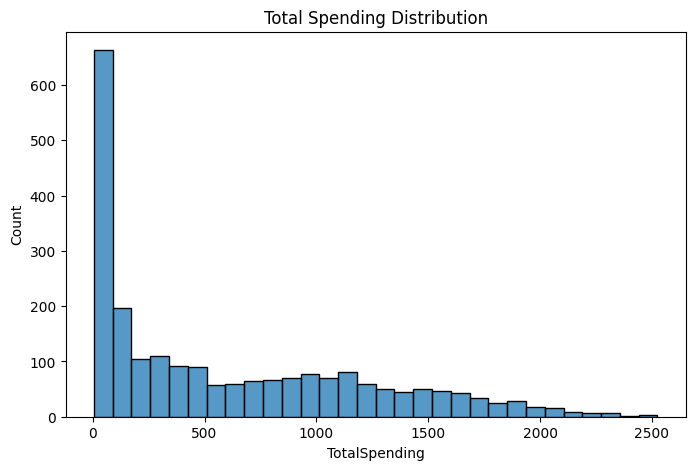

In [25]:
# Histograms
plt.figure(figsize=(8,5))
sns.histplot(df['TotalSpending'], bins=30)
plt.title('Total Spending Distribution')
plt.show()

**Interpretation:**

- **Right-skewed** – most spending is low (under 500)
- **Peak near 0** – many customers spend very little
- **Long tail to the right** – few high spenders (up to 2500)

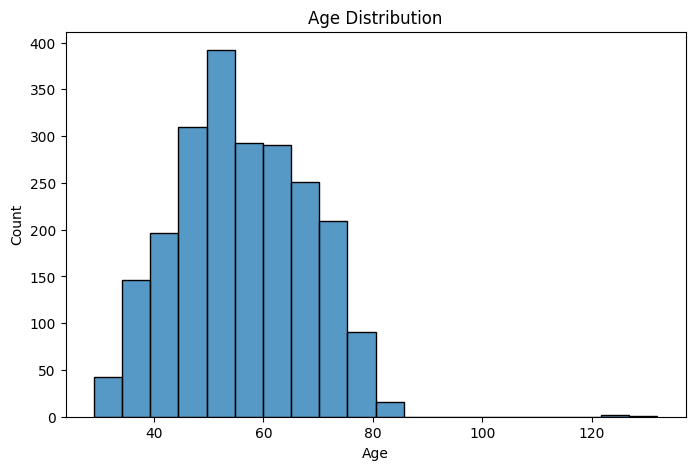

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

**Interpretation:**

- **Peak at ~45** – that’s the most common age
- **Few older adults** – sharp drop after 80, very few above 100

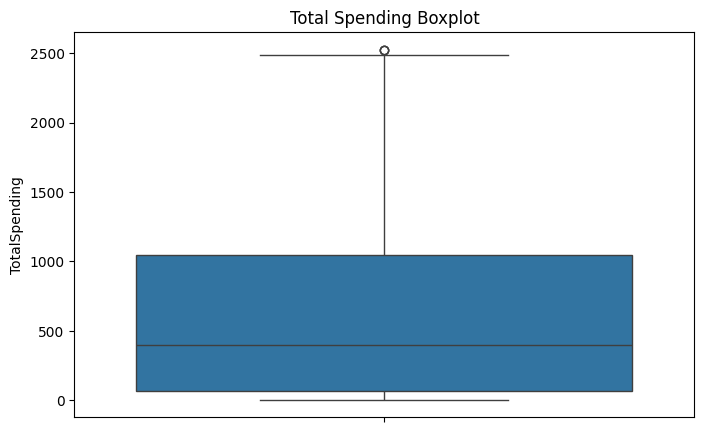

In [27]:
# Boxplots
plt.figure(figsize=(8,5))
sns.boxplot(y=df['TotalSpending'])
plt.title('Total Spending Boxplot')
plt.show()

**Interpretation:**

- **Median spending ~500** – half of customers spent less, half spent more
- **Low Q1** – 25% spent below ~200
- **Many outliers** – points above ~1500 are high spenders (upper tail)

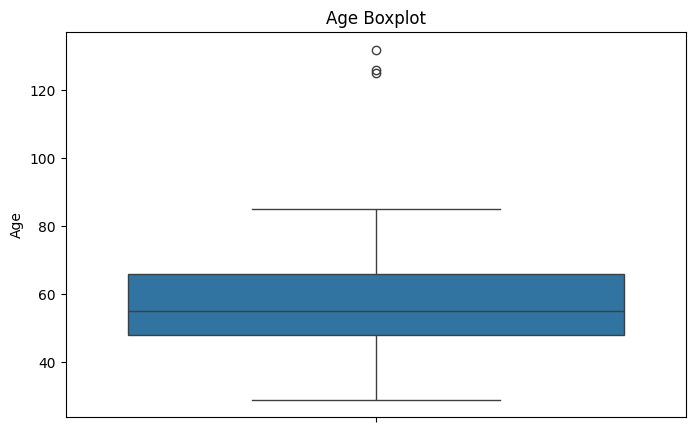

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Age'])
plt.title('Age Boxplot')
plt.show()

**Interpretation:**

- **Median age 50–55 years** – half are younger, half older
- **Even spread** – box is centered, not strongly skewed
- **Few high-age outliers** – dots above ~80 are older individuals
- **No low outliers** – minimum age around ~40, close to Q1

Step 5. **Categorical Encoding**

   * Ordinal encoding for `Education`.
   * One-hot encoding for `Marital_Status`.

In [29]:
# Ordinal encoding for Education
education_order = ['Basic','2N Cycle','Graduation','Master','Phd']
df['Education_Ord'] = df['Education'].apply(lambda x: education_order.index(x))
df['Education_Ord']

,Education_Ord
0,2
1,2
2,2
3,2
4,2
...,...
2235,4
2236,1
2237,2
2238,2


In [30]:
# One-hot encoding for Marital_Status
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

In [31]:
df.head(5)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,TotalChildren,Age,TotalSpending,TotalPurchases,Education_Ord,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Graduation,84835.0,0,0,2014-06-16,0,189,104,...,0,55,1190,14,2,False,False,False,False,False
1,1,1961,Graduation,57091.0,0,0,2014-06-15,0,464,5,...,0,64,577,17,2,False,False,True,False,False
2,10476,1958,Graduation,67267.0,0,1,2014-05-13,0,134,11,...,1,67,251,10,2,True,False,False,False,False
3,1386,1967,Graduation,32474.0,1,1,2014-05-11,0,10,0,...,2,58,11,3,2,False,False,False,True,False
4,5371,1989,Graduation,21474.0,1,0,2014-04-08,0,6,16,...,1,36,91,6,2,False,False,True,False,False


**Interpretation:**
* converted the Marital_Status column into binary columns (0 (false) or 1(true)) for each category using One-hot Encoding. We used drop_first=True to remove the first column, so any row where all remaining columns are 0 belongs to the dropped category.

Step 6. **Correlation Analysis**

* A correlation heatmap was generated to visualize the strength and direction of relationships between numerical variables in the dataset.

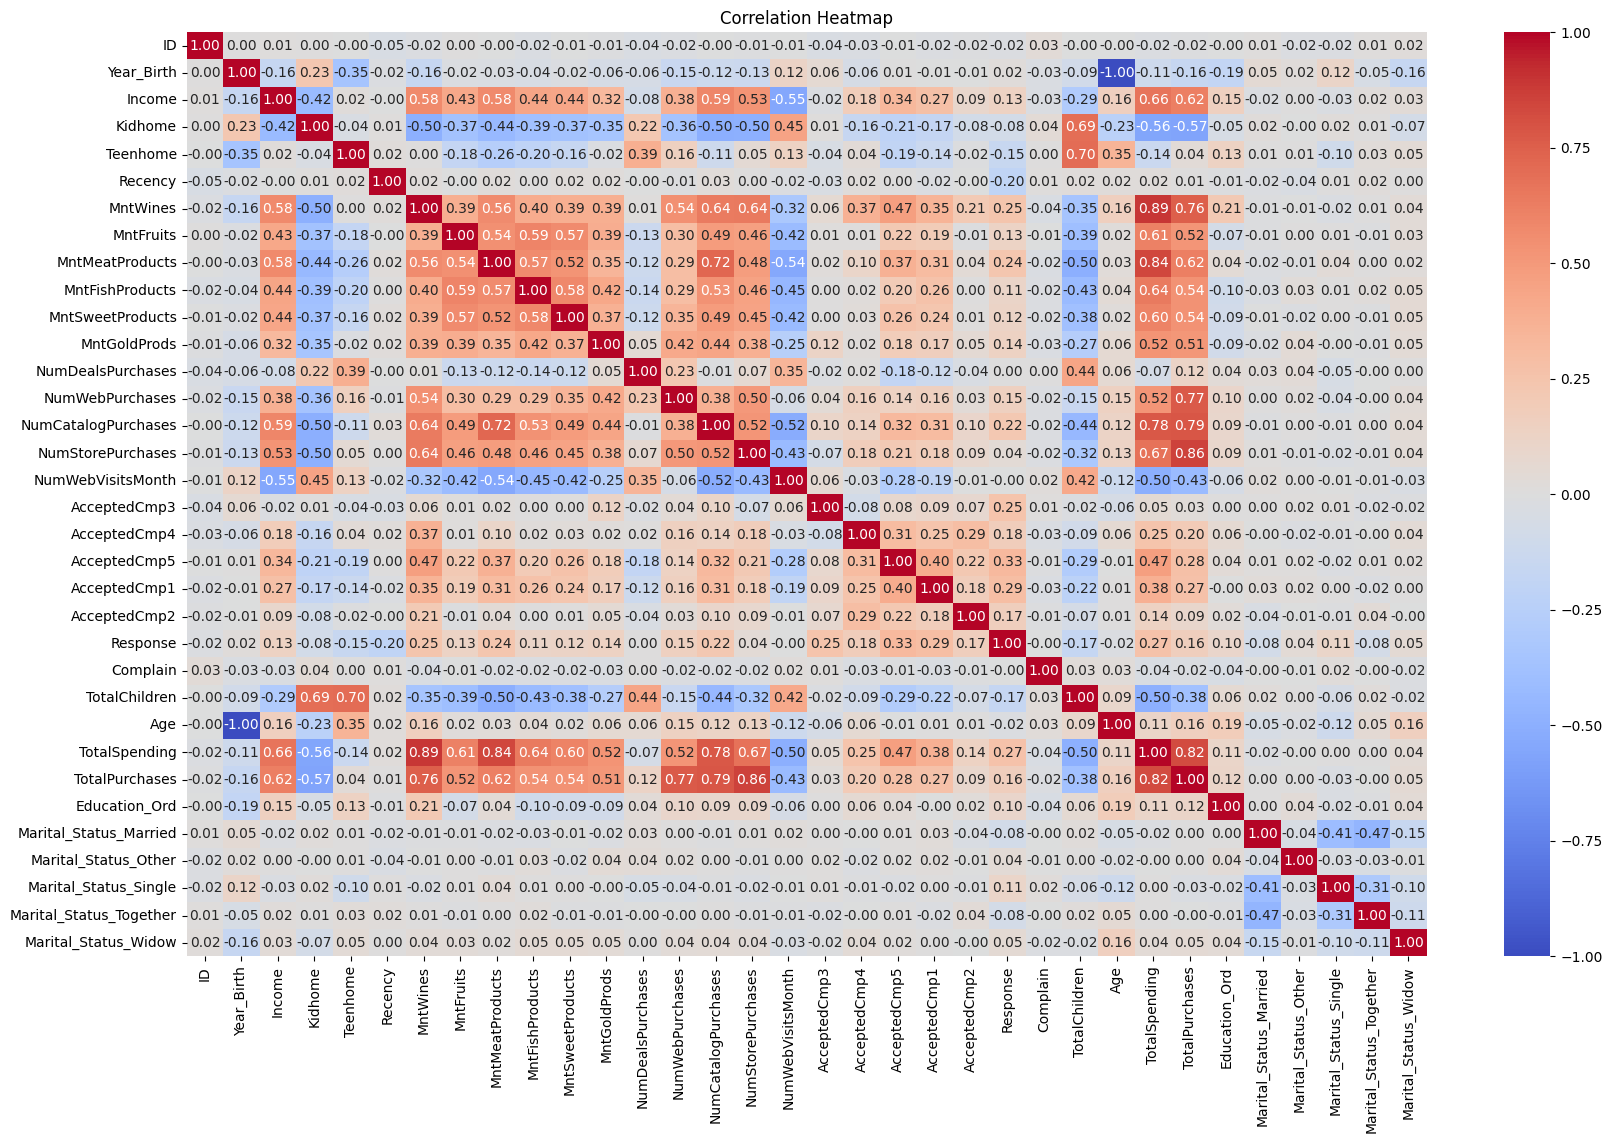

In [32]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Interpretation:**
- The correlation heatmap visualizes the strength and direction of relationships between numerical variables. Strong positive correlations were observed between total spending and product expenditures, as well as between total purchases and transaction channels. Negative correlation between age and year of birth confirms data consistency

Step 7. **Hypotheses Testing**


* A. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

In [33]:
# Group by AgeGroup and calculate average in-store purchases
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,30,50,100], labels=['Young','Middle-aged','Older'])
age_store_avg = df.groupby('AgeGroup')['NumStorePurchases'].mean().reset_index()

# Show numerical result
print(age_store_avg)

      AgeGroup  NumStorePurchases
0        Young           5.857143
1  Middle-aged           5.364462
2        Older           6.021247


**Interpretation**
* I divided the ages into three groups and then calculated the average number of in-store purchases for each group. I noticed that the older age group has the highest average, which suggests that they tend to prefer traditional shopping compared to the younger groups

* b.	Customers with children likely experience time constraints, making online shopping a more convenient option

   TotalChildren  NumWebPurchases  NumStorePurchases
0              0         4.393417           7.264890
1              1         4.285461           5.593972
2              2         3.232779           4.311164
3              3         2.867925           3.962264


<Figure size 800x500 with 0 Axes>

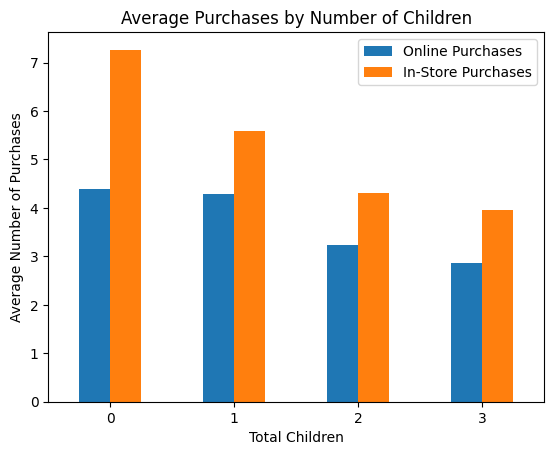

In [34]:
# Group customers by total children and calculate average purchases
df_kids_avg = df.groupby('TotalChildren')[['NumWebPurchases','NumStorePurchases']].mean().reset_index()
print(df_kids_avg)
# Bar plot to compare online vs in-store purchases across children groups
plt.figure(figsize=(8,5))
df_kids_avg.plot(
    x='TotalChildren',           # Use number of children as x-axis
    kind='bar',                  # Bar plot
)
plt.title('Average Purchases by Number of Children')  # Title
plt.xlabel('Total Children')                           # X-axis label
plt.ylabel('Average Number of Purchases')             # Y-axis label
plt.xticks(rotation=0)                                # Keep x-ticks horizontal
plt.legend(['Online Purchases','In-Store Purchases']) # Legend
plt.show()


**Interpretation**

* The bar plot shows the average number of online and in-store purchases by the number of children. We observe that as the number of children increases, the average purchases decrease for both online and in-store. This suggests that customers with more children tend to shop less overall, likely due to time constraints or family priorities, and therefore the results do not fully support the hypothesis that parents prefer online shopping more

* c.	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [35]:
#Calculate correlation between store, online, and catalog purchases
channel_corr = df[['NumStorePurchases','NumWebPurchases','NumCatalogPurchases']].corr()
print("Correlation matrix:\n", channel_corr)

Correlation matrix:
                      NumStorePurchases  NumWebPurchases  NumCatalogPurchases
NumStorePurchases             1.000000         0.502713             0.518738
NumWebPurchases               0.502713         1.000000             0.378376
NumCatalogPurchases           0.518738         0.378376             1.000000


**Interpretation**

- The correlation matrix shows the relationship between purchases from physical stores, online, and catalog channels. The positive correlations indicate that customers who buy from stores also tend to make purchases online or via catalog, suggesting that there is no strong evidence of in-store sales being negatively affected by alternative channels.

* d.	Does the United States significantly outperform the rest of the world in total purchase volumes?

In [36]:
print(df['Country'].unique())

['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


In [37]:
# Create a column for USA vs Rest of World based on actual spelling
df['CountryGroup'] = df['Country'].apply(lambda x: 'USA' if x == 'US' else 'Rest of World')

# Compare average total purchases
avg_purchases_country = df.groupby('CountryGroup')['TotalPurchases'].mean()
print(avg_purchases_country)

CountryGroup
Rest of World    12.487095
USA              13.513761
Name: TotalPurchases, dtype: float64


**Interpretation:**
* The results show that the average total purchases in the USA (13.51) are slightly higher than in the Rest of the World (12.49). This indicates that the USA outperforms the rest of the world slightly, but the difference is not very large, so the performance is better but not significantly higher.

Step 8.**Visual Analysis**

* Use appropriate visualization to help analyze the following:

* a. Identify the top-performing products and those with the lowest revenue.

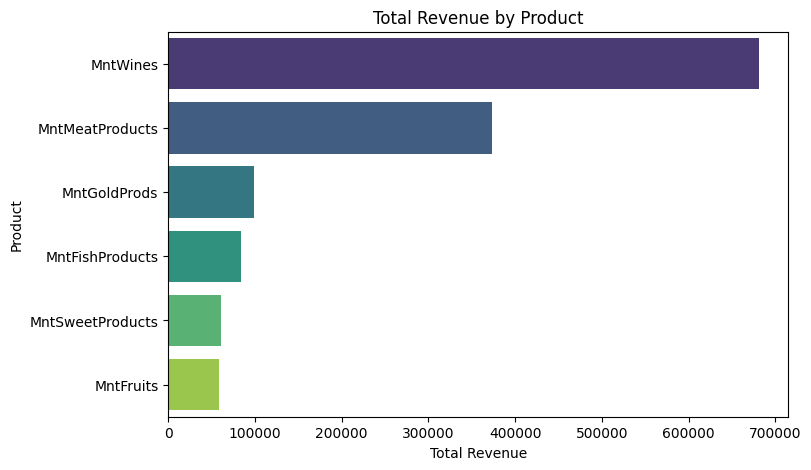

In [38]:
# Prepare data for plotting
product_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
product_revenue = df[product_cols].sum().sort_values(ascending=False).reset_index()
product_revenue.columns = ['Product','TotalRevenue']

# Horizontal bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='TotalRevenue', y='Product', data=product_revenue, palette='viridis')
plt.title('Total Revenue by Product')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.show()


**Interpretation:**
* The bar plot shows the total revenue generated by each product across all customers.

* Top-performing product: MntWines with the highest revenue, indicating strong customer demand.

* Lowest-performing product: MntFruits with the lowest revenue, suggesting lower popularity or sales volume.

* Other products like MntMeatProducts and MntGoldProds generate moderate revenue, while MntFishProducts and MntSweetProducts are lower but not the lowest.

* This visualization helps identify which products are driving the most revenue and which may need more marketing attention or promotions.

* b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

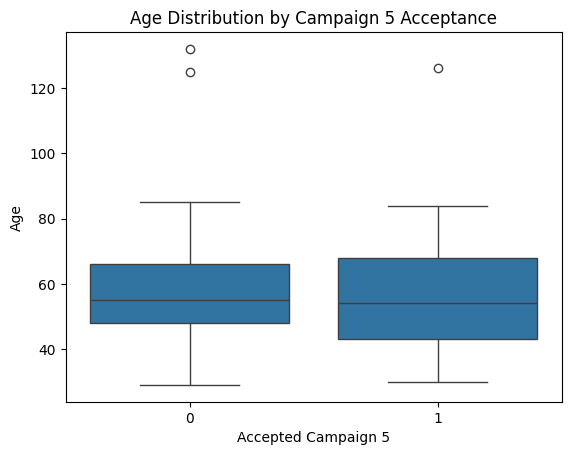

In [39]:
sns.boxplot(x='AcceptedCmp5', y='Age', data=df)
plt.title('Age Distribution by Campaign 5 Acceptance')
plt.xlabel('Accepted Campaign 5')
plt.ylabel('Age')
plt.show()

**Interpretation:**

* The boxplot shows the ages of customers who accepted (1) and did not accept (0) Campaign 5.

* Customers who accepted the campaign have a slightly different median age, but acceptance occurs across all ages.

* This suggests that age may have a small influence on campaign acceptance, but there is no strong pattern.

* c.	Determine the country with the highest number of customers who accepted the last campaign.

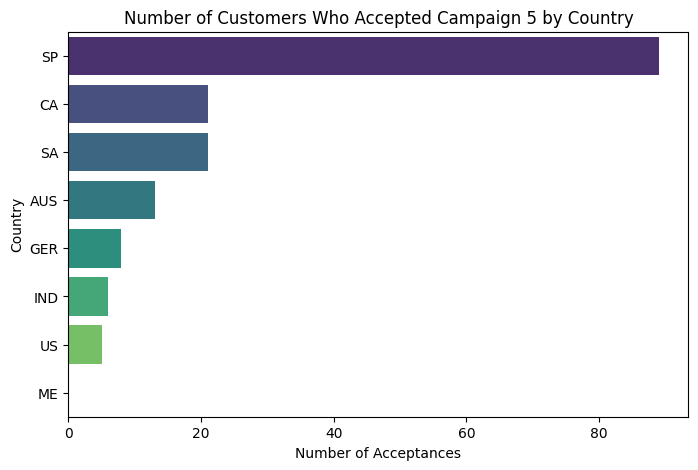

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

accepted_by_country = df.groupby('Country')['AcceptedCmp5'].sum().sort_values(ascending=False).reset_index()
accepted_by_country.columns = ['Country', 'AcceptedCount']

plt.figure(figsize=(8,5))
sns.barplot(x='AcceptedCount', y='Country', data=accepted_by_country, palette='viridis')
plt.title('Number of Customers Who Accepted Campaign 5 by Country')
plt.xlabel('Number of Acceptances')
plt.ylabel('Country')
plt.show()



**Interpretation:**

* The bar plot shows the **number of customers who accepted Campaign 5** in each country.
* **Spain (SP)** has the **highest number of acceptances**, while **Mexico (ME)** has the **lowest**.
* This clearly highlights which country responded best and which responded least to the campaign.


* d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

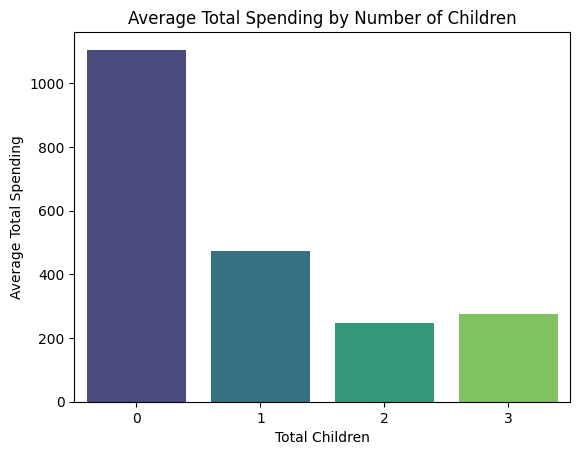

In [41]:
avg_spending = df.groupby('TotalChildren')['TotalSpending'].mean().reset_index()

sns.barplot(x='TotalChildren', y='TotalSpending', data=avg_spending, palette='viridis')
plt.title('Average Total Spending by Number of Children')
plt.xlabel('Total Children')
plt.ylabel('Average Total Spending')
plt.show()

**Interpretation:**

* The bar plot shows the **average total spending** for customers grouped by the number of children at home.
* Customers with more children tend to have **slightly higher total spending**, suggesting that having more children may lead to increased household expenditures.
* Overall, there is a **modest positive pattern** between the number of children and total spending.


* e.	Analyze the educational background of customers who lodged complaints in the last two years.



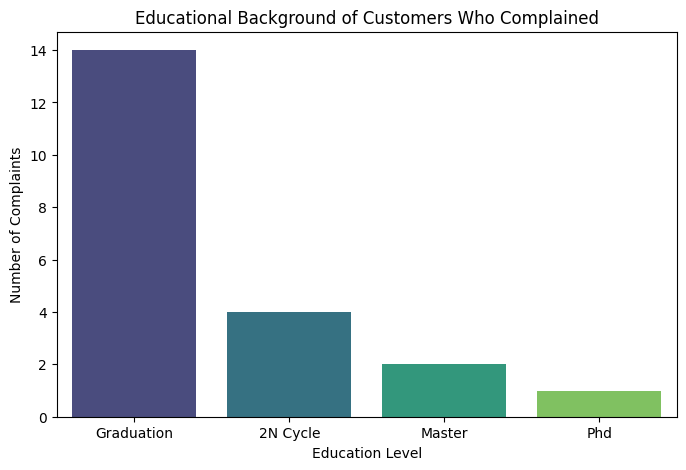

In [42]:
# Filter customers who lodged complaints
df_complain = df[df['Complain'] == 1]

# Count complaints by education level
edu_counts = df_complain['Education'].value_counts().reset_index()
edu_counts.columns = ['Education', 'Count']

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='Education', y='Count', data=edu_counts, palette='viridis')
plt.title('Educational Background of Customers Who Complained')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.show()

**Interpretation:**

* I focused on customers who lodged complaints in the last two years and counted the number of complaints for each education level. I then created a bar plot to visualize these counts, which helps us see which education levels have the most complaints and understand the educational background of the customers who complain the most.


Step 9. **Machine Learning + ROC Curve & AUC**
* In this step, machine learning models were used to predict whether a customer accepted the last marketing campaign (AcceptedCmp5).
* The data was split into training and testing sets, and three classification models were trained: Logistic Regression, Random Forest, and Gradient Boosting.

* ROC curves were generated using predicted probabilities to evaluate the trade-off between the True Positive Rate and the False Positive Rate.
* The AUC score was calculated for each model to summarize overall performance, where higher AUC values indicate better discrimination between customers who accepted the campaign and those who did not.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

Step 9.1 -  **Preparing Features and Target Variable**

* Define Target Variable

In [44]:
# Target variable: acceptance of the last marketing campaign
y = df['AcceptedCmp5']

* Define Feature Set

In [45]:
# Select features by removing target and non-numerical columns
X = df.drop(columns=[
    'AcceptedCmp5',
    'Dt_Customer',   # Date column
    'Education',     # Replaced by ordinal encoding
    'Country'        # Text-based categorical column
], errors='ignore')

* Keep Numerical Features Only

In [46]:
# Keep only numerical columns for machine learning models
X = X.select_dtypes(include=['number'])

* Train-Test Split

In [47]:
# Split the dataset into training and testing sets
# Stratify is used to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

* Display Dataset Shapes

In [48]:
# Display shapes of training and testing data
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1568, 28)
Test shape: (672, 28)


**Interpretation:**
* The dataset was successfully split into training and testing sets.
The training set contains 1568 samples, while the testing set contains 672 samples, with 28 features in each set.

* This split follows a 70% training and 30% testing ratio, which helps ensure that the models are trained on sufficient data while still being evaluated on unseen data to measure their generalization performance.

Step 9.2 -  **Training Multiple Models and Evaluating with ROC & AUC**

* Define Machine Learning Models


In [51]:
# Initialize classification models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Store models in a dictionary for comparison
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

* Train Models and Plot ROC Curves

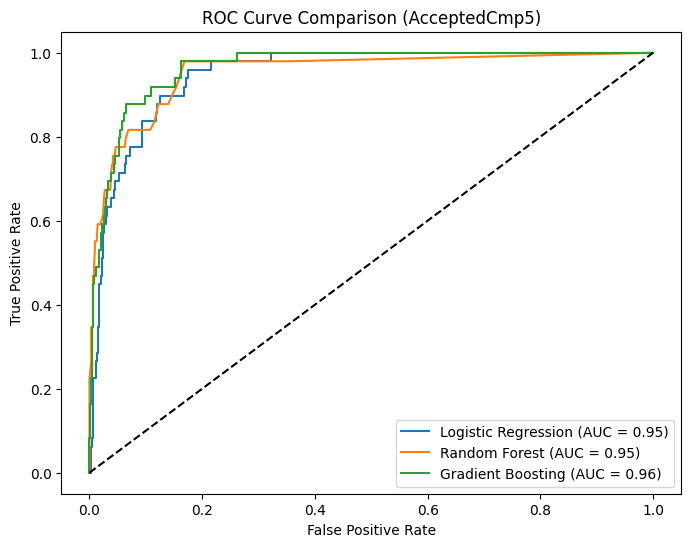

In [52]:
# Create ROC curve plot
plt.figure(figsize=(8,6))

auc_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_prob)
    auc_results[name] = auc_score

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot random classifier reference line
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (AcceptedCmp5)")
plt.legend()
plt.show()

**ROC Curve Interpretation**
* All three models show strong performance, with ROC curves clearly above the random baseline.
* Gradient Boosting achieves the highest AUC (0.96), followed closely by Logistic Regression and Random Forest (0.95).
* This indicates that Gradient Boosting is the best-performing model for predicting campaign acceptance.


* Display AUC Scores in a Table

In [53]:
# Create a table to compare AUC scores
auc_df = pd.DataFrame(
    auc_results.items(),
    columns=["Model", "AUC"]
).sort_values(by="AUC", ascending=False)

auc_df

,Model,AUC
2,Gradient Boosting,0.964228
1,Random Forest,0.952042
0,Logistic Regression,0.948505


**AUC Results Interpretation**
* The table shows the AUC scores for the three classification models used in this study.
* The Gradient Boosting model achieved the highest AUC score (0.964), indicating the strongest ability to distinguish between customers who accepted the campaign and those who did not.

* The Random Forest model also performed well with an AUC of 0.952, followed closely by Logistic Regression with an AUC of 0.949.
* Overall, all models demonstrate strong predictive performance, with Gradient Boosting being the best-performing model based on the AUC metric.